In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df  = pd.read_csv('drive/My Drive/PFA/PFA_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.drop(df.filter(regex="title"),axis=1, inplace=True)
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,fake
1,House Intelligence Committee Chairman Devin Nu...,fake
2,"On Friday, it was revealed that former Milwauk...",fake
3,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis used his annual Christmas Day mes...,fake


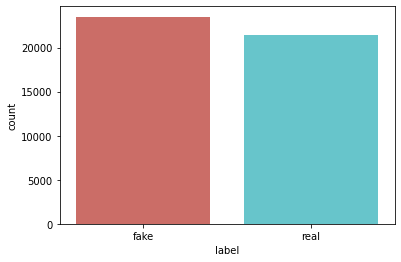

In [0]:
sn.countplot(x='label', data=df, palette='hls')

In [0]:
df['bool'] = np.where(df['label'] == "fake", 0, 1)
df.head(10)

,text,label,bool
0,Donald Trump just couldn t wish all Americans ...,fake,0
1,House Intelligence Committee Chairman Devin Nu...,fake,0
2,"On Friday, it was revealed that former Milwauk...",fake,0
3,"On Christmas day, Donald Trump announced that ...",fake,0
4,Pope Francis used his annual Christmas Day mes...,fake,0
5,The number of cases of cops brutalizing and ki...,fake,0
6,Donald Trump spent a good portion of his day a...,fake,0
7,In the wake of yet another court decision that...,fake,0
8,Many people have raised the alarm regarding th...,fake,0
9,Just when you might have thought we d get a br...,fake,0


In [0]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [0]:
len(vect.get_feature_names())

111818

In [0]:

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<35935x111818 sparse matrix of type '<class 'numpy.int64'>'
	with 7525968 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=2) 
model.fit(X_train_vectorized, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8913141833008917


In [0]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['that' 'is' 'you' 'this' 'it' 'they' 'trump' 'he' 'and' 'are']

Largest Coefs: 
['said' 'on' 'in' 'reuters' 'its' 'would' 'government' 'state' 'has'
 'united']


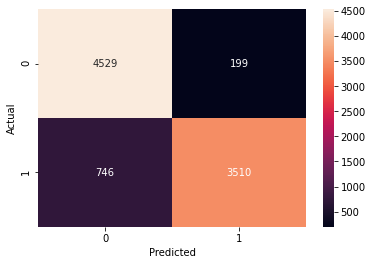

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()